### Import libraries

In [4]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
from collections import OrderedDict

In [5]:
path_to_current_folder = pathlib.Path(os.getcwd())
path_to_dataset_folder = path_to_current_folder.parent / "dataset"
path_to_dataset_file = path_to_dataset_folder / "medium_articles.csv"
df = pl.scan_csv(path_to_dataset_file)
df.limit(5).select("*").collect()

title,text,url,authors,timestamp,tags
str,str,str,str,str,str
"""Mental Note Vo…","""Photo by Josh …","""https://medium…","""['Ryan Fan']""","""2020-12-26 03:…","""['Mental Healt…"
"""Your Brain On …","""Your Brain On …","""https://medium…","""['Simon Spicha…","""2020-09-23 22:…","""['Mental Healt…"
"""Mind Your Nose…","""Mind Your Nose…","""https://medium…","""[]""","""2020-10-10 20:…","""['Biotechnolog…"
"""The 4 Purposes…","""Passionate abo…","""https://medium…","""['Eshan Samara…","""2020-12-21 16:…","""['Health', 'Ne…"
"""Surviving a Ro…","""You’ve heard o…","""https://medium…","""['Rishav Sinha…","""2020-02-26 00:…","""['Brain', 'Hea…"


In [16]:
mlb = pd.read_pickle(path_to_dataset_folder / "multilabelbinarizer.pickle")
for index, label in enumerate(mlb.classes_):
    print(label)
    if index > 3:
        break

acq
alum
barley
bop
carcass


In [18]:
mlb.classes_

array(['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa',
       'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn',
       'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk',
       'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut',
       'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt',
       'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead',
       'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx',
       'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr',
       'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel',
       'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil',
       'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship',
       'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean',
       'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed',
       'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', '

In [68]:
schema = df.schema
schema

OrderedDict([('title', String),
             ('text', String),
             ('url', String),
             ('authors', String),
             ('timestamp', String),
             ('tags', String)])

### Аrticles with null dates

In [70]:
df.filter(pl.col("timestamp").is_not_null()).select(pl.len()).collect()

len
u32
192366


In [71]:
df.filter(pl.col("timestamp").is_null()).select(pl.len()).collect()

len
u32
2


In [72]:
df = df.filter(pl.col("timestamp").is_not_null())

### Distribution of articles by year

In [74]:
df = (
    df.with_columns(
        pl.col("timestamp").str.split(" ").list.first().str.to_datetime().alias("timestamp"),
    ).with_columns(
        pl.col("timestamp").dt.year().alias("year"),
        pl.col("timestamp").dt.month().alias("month"),
    )
)
df.select("*").limit(5).collect()

title,text,url,authors,timestamp,tags,year,month
str,str,str,str,datetime[μs],str,i32,i8
"""Mental Note Vo…","""Photo by Josh …","""https://medium…","""['Ryan Fan']""",2020-12-26 00:00:00,"""['Mental Healt…",2020,12
"""Your Brain On …","""Your Brain On …","""https://medium…","""['Simon Spicha…",2020-09-23 00:00:00,"""['Mental Healt…",2020,9
"""Mind Your Nose…","""Mind Your Nose…","""https://medium…","""[]""",2020-10-10 00:00:00,"""['Biotechnolog…",2020,10
"""The 4 Purposes…","""Passionate abo…","""https://medium…","""['Eshan Samara…",2020-12-21 00:00:00,"""['Health', 'Ne…",2020,12
"""Surviving a Ro…","""You’ve heard o…","""https://medium…","""['Rishav Sinha…",2020-02-26 00:00:00,"""['Brain', 'Hea…",2020,2


In [75]:
df_articles_count_by_year = (
    df.group_by("year")
    .agg(
        pl.len().alias("count_articles"),
    ).select("year", "count_articles").collect()
)

In [76]:
df_articles_count_by_year

year,count_articles
i32,u32
1992,1
1917,1
1987,1
2015,636
2016,2689
2030,5
2003,1
2017,4649
1991,1


Drop articles from dataset with year less than 2012 (Medium website created day). 

In [78]:
df = df.filter((pl.col("year") >= 2012) & (pl.col("year") <= 2022))
df_articles_count_by_year = (
    df.group_by("year")
    .agg(
        pl.len().alias("count_articles"),
    ).select("year", "count_articles").collect()
)
df_articles_count_by_year.sort("year").limit(5).select("*")

year,count_articles
i32,u32
2012,1
2013,1
2014,1
2015,636
2016,2689


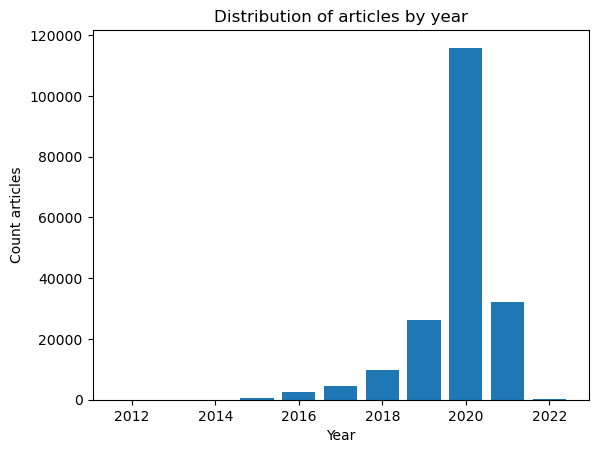

In [79]:
plt.bar(df_articles_count_by_year["year"], df_articles_count_by_year["count_articles"])
plt.title("Distribution of articles by year")
plt.xlabel("Year")
plt.ylabel("Count articles")
plt.show()

### Most popular articles by tags

In [81]:
df = (
    df.with_columns(
        pl.col("tags").str.slice(1).alias("tags"),
    ).with_columns(
        pl.col("tags").str.len_chars().alias("len_tags"), 
    ).with_columns(
        pl.col("tags").str.slice(0, pl.col("len_tags") - 1).alias("tags"), 
    ).with_columns(
        pl.col("tags").str.replace_all("'", "").alias("tags"),  
    ).with_columns(
        pl.col("tags").str.split(", ").alias("tags"),
    )
)

df_exploded = df.explode("tags")

df_articles_tags = (
    df_exploded.group_by("tags")
    .agg(
        pl.len().alias("count_tags"),
    ).collect()
)

df_articles_tags.sort("count_tags", descending=True).head(10)

tags,count_tags
str,u32
"""Blockchain""",7533
"""Data Science""",7410
"""Technology""",6384
"""Programming""",6364
"""Poetry""",6336
"""Cryptocurrency…",6244
"""Machine Learni…",6055
"""Life""",5954
"""Bitcoin""",5800


**Conclusion:** Most popular themes on medium are computer sciences

### Average number of tags per article


In [84]:
df_articles_tags_count = (
    df.with_columns(
        pl.col("tags").list.len().alias("tags_count"),
    )
)

df_articles_tags_count.select(pl.mean("tags_count")).collect()

tags_count
f64
4.577685


In [85]:
df.schema

OrderedDict([('title', String),
             ('text', String),
             ('url', String),
             ('authors', String),
             ('timestamp', Datetime(time_unit='us', time_zone=None)),
             ('tags', List(String)),
             ('year', Int32),
             ('month', Int8),
             ('len_tags', UInt32)])

### Len text distribution

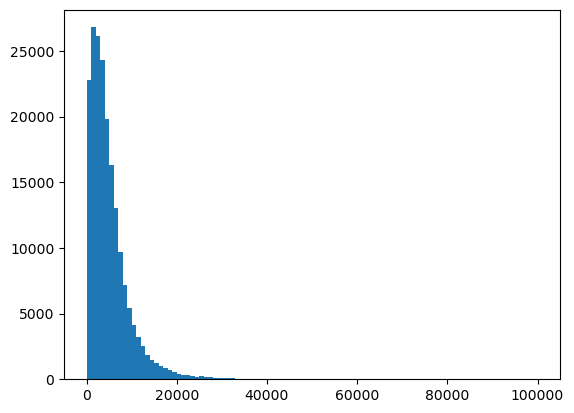

In [97]:
df = (
    df.with_columns(
        pl.col("text").str.len_chars().alias("text_len")
    )
)

plt.hist(df.select("text_len").collect(), bins=100)
plt.show()

In [101]:
df.select(pl.mean("text_len")).collect()

text_len
f64
5097.762232


### Save dataset after preprocessing

In [109]:
path_to_dataset_after_preprossing = path_to_dataset_folder / "medium_articles.parquet"
df.select("text", "tags").collect().write_parquet(path_to_dataset_after_preprossing)

In [125]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel = MultiLabelBinarizer()

labels = multilabel.fit_transform(df.select("tags").limit(5).collect()["tags"]).astype('float32')
labels[0]

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)

In [131]:
labels[1], labels[2], labels[3], labels[4]

(array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32),
 array([1., 1., 0., 0., 0., 0., 1., 0., 1., 1.], dtype=float32),
 array([0., 0., 0., 0., 1., 1., 1., 1., 1., 0.], dtype=float32),
 array([0., 1., 0., 1., 1., 0., 0., 1., 1., 0.], dtype=float32))

In [123]:
df.select(pl.len()).collect()

len
u32
192347


In [141]:
set(list(df.select("tags").limit(5).explode("tags").collect()["tags"])).__len__()

10

In [ ]:
df.explode("tags").select("tags")